# Optimum Interpolation Sea Surface Temperature (OISST) v2.1

## Purpose
This notebook is designed to demonstrate how to access Optimum Interpolation Sea Surface Temperature (OISST) v2.1 data at NOAA's National Centers for Environmental Information (NCEI) using Jupyter notebooks and Python.

## <a href=https://www.ncdc.noaa.gov/oisst/optimum-interpolation-sea-surface-temperature-oisst-v21>Background</a>
The NOAA 1/4° daily Optimum Interpolation Sea Surface Temperature (or daily OISST) is an analysis constructed by combining observations from different platforms (satellites, ships, buoys and Argo floats) on a regular global grid. A spatially complete SST map is produced by interpolating to fill in gaps. The methodology includes bias adjustment of satellite and ship observations (referenced to buoys) to compensate for platform differences and sensor biases. This proved critical during the Mt. Pinatubo eruption in 1991, when the widespread presence of volcanic aerosols resulted in infrared satellite temperatures that were much cooler than actual ocean temperatures<sup>1</sup>. Starting from April 1, 2020, NCEI released a new version, OISST v2.1, to replace OISST v2. OISST v2 had been stopped on April 26, 2020 due to unavailable input data to it.

Currently OISST v2.1 data are available from Sept 1, 1981 onward and updated nominally daily. The new version has significant quality improvement for data starting from January 1, 2016 onward - see below for more details. For the data from September 1981 to December 2015, data for SST and SST anomaly are the same as v2 but format was updated from netCDF3 to netCDF4 with updated metadata in v2.1.

Major improvements from v2 to v2.1 for January 2016 onward include:
1. In-Situ ship and buoy data changed from the NCEP Traditional Alphanumeric Codes (TAC) to the NCEI merged TAC + Binary Universal Form for the Representation (BUFR) data, with large increase of buoy data included to correct satellite SST biases
2. Addition of Argo float observed SST data as well, for further correction of satellite SST biases
3. Satellite input from the METOP-A and NOAA-19 to METOP-A and METOP-B, removing degraded satellite data
4. Revised ship-buoy SST corrections for improved accuracy
5. Revised sea-ice-concentration to SST conversion to remove warm biases in the Arctic region<sup>2</sup>.

OISST is an analysis constructed by combining observations from different platforms (satellites, ships, buoys and Argo floats) on a regular global grid. A spatially complete SST map is produced by interpolating to fill in gaps. The methodology includes bias adjustment of satellite and ship observations (referenced to buoys) to compensate for platform differences and sensor biases. This proved critical during the Mt. Pinatubo eruption in 1991, when the widespread presence of volcanic aerosols resulted in infrared satellite temperatures that were much cooler than actual ocean temperatures<sup>1</sup>.

#### Additional Data
Three other maps at the same 1/4° spatial resolution complement the daily OISST:

1. Anomalies (i.e., the daily OISST minus a 30-year climatological mean) represent departures from "normal" or average conditions. Computation of several climate indices, such as the El Niño index, utilize SST anomalies.
2. The error field provides a measure of confidence or quality, allowing users to exclude (using a threshold) or to minimize (using weights) the impact of daily OISST values with greater interpolation errors.
3. The seven-day median of daily sea ice concentrations serves as the basis for proxy SSTs in the marginal ice zone, where observations are lacking. The proxy SST allows interpolation of temperatures from the open ocean to the seasonal sea ice margin.

#### References
1. Reynolds, R. W., 1993: Impact of Mount Pinatubo Aerosols on Satellite-derived Sea Surface Temperatures. *J. Climate*, __6__, 768–774, <a href="https://doi.org/10.1175/1520-0442(1993)006<0768:IOMPAO>2.0.CO;2">https://doi.org/10.1175/1520-0442(1993)006<0768:IOMPAO>2.0.CO;2</a>.

2. Banzon, V., T. M. Smith, M. Steele, B. Huang, and H. Zhang, 2020: Improved Estimation of Proxy Sea Surface Temperature in the Arctic. *J. Atmos. Oceanic Technol.*, __37__, 341–349, <a href=https://doi.org/10.1175/JTECH-D-19-0177.1>https://doi.org/10.1175/JTECH-D-19-0177.1</a>.

## Access Services
### <a href=https://www.ncei.noaa.gov/thredds/catalog.html>NCEI THREDDS</a>
1. <a href=https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.html>OISST v2.1 Individual Daily File Access</a>
2. <a href="https://www.ncei.noaa.gov/thredds/catalog/ncFC/fc-oisst-daily-avhrr-only-dly/catalog.html?dataset=ncFC/fc-oisst-daily-avhrr-only-dly/OISST_Daily_AVHRR-only_Feature_Collection_best.ncd">OISST v2.1 Daily Feature Collection Best Time Series</a>: An aggregation of final daily netCDF4 files from February 28, 2020 to 14 days prior to current date.
3. <a href="https://www.ncei.noaa.gov/thredds/catalog/ncFC/fc-oisst-daily-avhrr-only-dly-prelim/catalog.html?dataset=ncFC/fc-oisst-daily-avhrr-only-dly-prelim/OISST_Preliminary_Daily_AVHRR-only_Feature_Collection_best.ncd">OISST v2.1 Daily Preliminary Feature Collection Best Time Series</a>: An aggregation of preliminary daily netCDF4 files in a trailing 14 day window.


### <a href=https://www.ncei.noaa.gov/data/>NCEI Web Accessible Folder (WAF)</a>
1. <a href=https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr>OISST v2.1 Individual Daily File Access</a>

## Google Colaboratory Preparation

Uncomment and run the following lines only if you are running this Notebook in Google Colaboratory (<a href="https://colab.research.google.com/github/astg606/py_materials/blob/master/visualization/introduction_cartopy.ipynb#scrollTo=D-JajVlZli2J">Source</a>).

In [1]:
# !apt-get install libproj-dev proj-data proj-bin
# !apt-get install libgeos-dev
# !pip install cython
# !pip install cartopy
# !apt-get -qq install python-cartopy python3-cartopy
# !pip uninstall -y shapely
# !pip install shapely --no-binary shapely
# !pip install netCDF4

## OISST on THREDDS
### Introduction
The <a href="https://www.ncei.noaa.gov/thredds/catalog/ncFC/fc-oisst-daily-avhrr-only-dly/catalog.html?dataset=ncFC/fc-oisst-daily-avhrr-only-dly/OISST_Daily_AVHRR-only_Feature_Collection_best.ncd">OISST v2.1 Daily Feature Collection Best Time Series</a> provides access to OISST netCDF4 data made continuous along the time dimension. The <a href=https://www.ncei.noaa.gov/thredds/dodsC/ncFC/fc-oisst-daily-avhrr-only-dly/OISST_Daily_AVHRR-only_Feature_Collection_best.ncd>OPeNDAP</a> access point can be used to retrieve subsetted data on demand using the `xarray` and `netCDF4` packages

### Loading the dataset
Load the dataset from THREDDS using the OPeNDAP URL.

In [2]:
# Setup
import netCDF4
import numpy as np
import xarray as xr

In [3]:
# Load the dataset using the OPeNDAP URL
oisst = xr.open_dataset('https://www.ncei.noaa.gov/thredds/dodsC/ncFC/fc-oisst-daily-avhrr-only-dly/OISST_Daily_AVHRR-only_Feature_Collection_best.ncd')
oisst

<xarray.Dataset>
Dimensions:      (lat: 720, lon: 1440, time: 263, zlev: 1)
Coordinates:
  * zlev         (zlev) float32 0.0
  * lat          (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon          (lon) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * time         (time) datetime64[ns] 2020-02-28T12:00:00 ... 2020-11-16T12:00:00
    time_run     (time) datetime64[ns] ...
Data variables:
    time_offset  (time) datetime64[ns] ...
    sst          (time, zlev, lat, lon) float32 ...
    anom         (time, zlev, lat, lon) float32 ...
    err          (time, zlev, lat, lon) float32 ...
    ice          (time, zlev, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.4, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20201115.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              GRID
    history:                    Final file created using preliminary as first...
    date_modified:              2020-11-30T09:13:00Z
    date_created:               2020-11-30T09:13:00Z
    product_version:            Version v02r01
    processing_level:           NOAA Level 4
    institution:                NOAA/National Centers for Environmental Infor...
    creator_url:                https://www.ncei.noaa.gov/
    creator_email:              oisst-help@noaa.gov
    keywords:                   Earth Science > Oceans > Ocean Temperature > ...
    keywords_vocabulary:        Global Change Master Directory (GCMD) Earth S...
    platform:                   Ships, buoys, Argo floats, MetOp-A, MetOp-B
    platform_vocabulary:        Global Change Master Directory (GCMD) Platfor...
    instrument:                 Earth Remote Sensing Instruments > Passive Re...
    instrument_vocabulary:      Global Change Master Directory (GCMD) Instrum...
    standard_name_vocabulary:   CF Standard Name Table (v40, 25 January 2017)
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.25
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    time_coverage_start:        2020-11-15T00:00:00Z
    time_coverage_end:          2020-11-15T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    featureType:                GRID
    location:                   Proto fmrc:OISST_Daily_AVHRR-only_Feature_Col...

### Understanding the dataset
From the output of the previous cell, one can see that the `xarray.Dataset` variable `ds` contains four data variables, `sst`, `anom`, `err`, and `ice`, which are functions of four coordinate dimensions, `zlev`, `lat`, `lon`, and `time`.

The global attributes reveal that the data variables are gridded along geospatial ranges -90 to 90 degrees North and 0 to 360 degrees East. The coordinate attributes clarify this grid as 720 `lat` steps in 0.25-degree intervals from -89.875 to 89.8975 degrees North, inclusive, and 1440 `lon` steps in 0.25-degree intervals from 0.125 to 359.875 degrees East, inclusive. The time coordinate starts at 1200 UTC February 28, 2020 and has daily steps up to 14 days prior to current date. `zlev`, or the sea surface height, has only one possible value: 0 m.

The `sst` variable represents the daily sea surface temperature in degrees Celsius, `anom` is the daily sea surface temperature anomaly in degrees Celsius, `err` is the estimated error standard deviation of `sst` in degrees Celsius, and `ice` is the sea ice concentration in percent by volume.

### Visualizing the data
`xarray.Dataset`s integrate well with `cartopy` maps. Simply instantiated an `xarray.DataArray` by selecting one of the data variables and selecting values for `zlev` and `time`.

In [4]:
# Select the sst DataArray
sst = oisst['sst']
sst

<xarray.DataArray 'sst' (time: 263, zlev: 1, lat: 720, lon: 1440)>
[272678400 values with dtype=float32]
Coordinates:
  * zlev      (zlev) float32 0.0
  * lat       (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * time      (time) datetime64[ns] 2020-02-28T12:00:00 ... 2020-11-16T12:00:00
    time_run  (time) datetime64[ns] 2020-02-28T12:00:00 ... 2020-11-16T12:00:00
Attributes:
    units:        Celsius
    long_name:    Daily sea surface temperature
    _ChunkSizes:  [   1    1  720 1440]

In [5]:
# Select values for zlev and time using isel (index select)
# isel(zlev=0) selects the first zlev value
# sel(time=np.datetime64('2020-07-04'), method='nearest') selects the time value closest to July 4, 2020.
sst_20200704 = sst.isel(zlev=0).sel(time='2020-07-04', method='nearest')
sst_20200704

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
    zlev      float32 0.0
  * lat       (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * time      (time) datetime64[ns] 2020-07-04T12:00:00
    time_run  (time) datetime64[ns] 2020-07-04T12:00:00
Attributes:
    units:        Celsius
    long_name:    Daily sea surface temperature
    _ChunkSizes:  [   1    1  720 1440]

In [6]:
# Setup mapping with cartopy
import cartopy
from cartopy import crs as ccrs
from cartopy import feature as cfeat
from matplotlib import pyplot as plt
%matplotlib inline

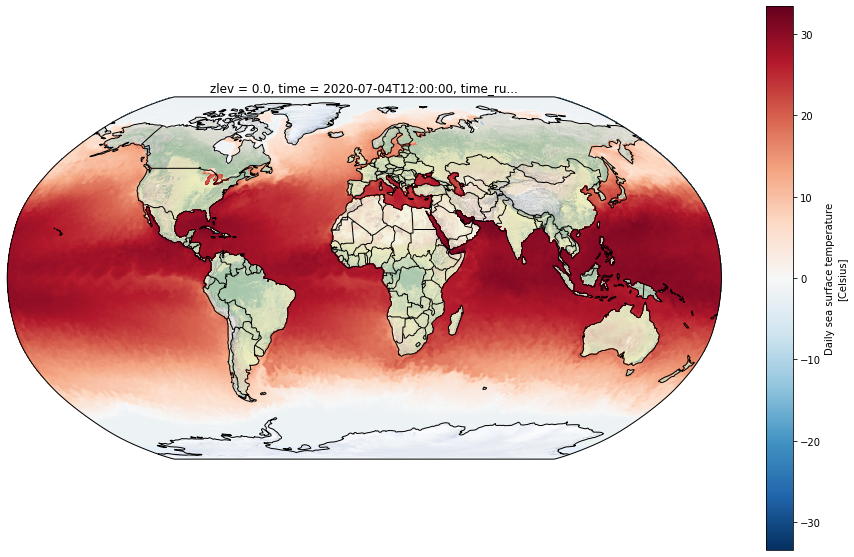

In [7]:
# Map the data
_ = plt.figure(figsize=(16,10))
ax = plt.axes(projection=ccrs.Robinson())  # Choose projection
ax.coastlines()  # Add coastlines
ax.stock_img()  # Add land coloring
ax.add_feature(cfeat.BORDERS)  # Add national borders

sst_20200704.plot(ax=ax, transform=ccrs.PlateCarree())
plt.show()

### Using the data
The mean Arctic ice concentration can be analyzed over time using the `ice` DataArray and slicing all data above 66.5 degrees North.

In [8]:
# Select the ice DataArray
ice = oisst['ice']
ice

<xarray.DataArray 'ice' (time: 263, zlev: 1, lat: 720, lon: 1440)>
[272678400 values with dtype=float32]
Coordinates:
  * zlev      (zlev) float32 0.0
  * lat       (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon       (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * time      (time) datetime64[ns] 2020-02-28T12:00:00 ... 2020-11-16T12:00:00
    time_run  (time) datetime64[ns] 2020-02-28T12:00:00 ... 2020-11-16T12:00:00
Attributes:
    units:        %
    long_name:    Sea ice concentration
    _ChunkSizes:  [   1    1  720 1440]

In [9]:
# Select only the Arctic data and find the mean over geospatial dimensions
ice_Arctic = ice.isel(zlev=0).sel(lat=slice(66.5, 90))
ice_Arctic_mean = ice_Arctic.mean(dim=['lat', 'lon'])
ice_Arctic_mean

C:\NOAA_Scripts\miniconda3\envs\jupyter\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'ice' (time: 263)>
array([0.96248347, 0.9630153 , 0.96391654, 0.9644939 , 0.9655012 ,
       0.9659529 , 0.9661525 , 0.9667719 , 0.967418  , 0.96771544,
       0.96784836, 0.96736753, 0.96747845, 0.967814  , 0.9671065 ,
       0.96664476, 0.9661162 , 0.96535593, 0.96406394, 0.96439743,
       0.9641876 , 0.96346813, 0.9636725 , 0.96367764, 0.9639619 ,
       0.96451175, 0.96493083, 0.9647046 , 0.96435714, 0.9647595 ,
       0.96451133, 0.9644147 , 0.9650793 , 0.9654314 , 0.9649372 ,
       0.9648856 , 0.9647491 , 0.96460134, 0.9643976 , 0.9643145 ,
       0.964127  , 0.96415883, 0.96442   , 0.9642762 , 0.9643788 ,
       0.964283  , 0.96440285, 0.9644184 , 0.9645106 , 0.96406996,
       0.9626486 , 0.9606884 , 0.95896953, 0.9578027 , 0.9562903 ,
       0.95476246, 0.953092  , 0.9527743 , 0.9519258 , 0.95068216,
       0.9485349 , 0.94840115, 0.94747543, 0.94669694, 0.94651526,
       0.94645846, 0.9469318 , 0.9483692 , 0.94932693, 0.9501799 ,
       0.950667  , 0.95087814, 0.9499551 , 0.9492767 , 0.94849765,
       0.9467241 , 0.94588494, 0.9444483 , 0.9403635 , 0.93618304,
       0.93329924, 0.932784  , 0.9320594 , 0.93188655, 0.9307936 ,
       0.92937106, 0.926576  , 0.92439586, 0.92121345, 0.9176476 ,
       0.91696304, 0.91726834, 0.9165607 , 0.9185644 , 0.92124647,
       0.92256695, 0.9245764 , 0.9259913 , 0.92709684, 0.9276806 ,
       0.9290173 , 0.92949295, 0.9300313 , 0.92943454, 0.9279936 ,
       0.9251063 , 0.922833  , 0.92073566, 0.91772944, 0.9147842 ,
       0.9116838 , 0.90903926, 0.9049103 , 0.901725  , 0.89769816,
       0.89412653, 0.89184123, 0.8920375 , 0.8906328 , 0.88884515,
       0.88943166, 0.88931787, 0.88716316, 0.8860002 , 0.8840095 ,
       0.8818242 , 0.88017243, 0.87407815, 0.86264306, 0.85054106,
       0.84470594, 0.8431618 , 0.8442012 , 0.8438277 , 0.8434179 ,
       0.8420406 , 0.8420097 , 0.84285825, 0.84153706, 0.8433352 ,
       0.8385266 , 0.8352389 , 0.8332646 , 0.8304498 , 0.83223534,
       0.831794  , 0.83274114, 0.8319584 , 0.83033943, 0.8318124 ,
       0.83113426, 0.82950366, 0.8238706 , 0.8158422 , 0.8097945 ,
       0.8046795 , 0.80081815, 0.8001705 , 0.79935384, 0.7967641 ,
       0.7940707 , 0.792891  , 0.7935217 , 0.79324913, 0.79578525,
       0.801888  , 0.8043392 , 0.80316186, 0.8005474 , 0.7966851 ,
       0.7945648 , 0.79138327, 0.78736764, 0.7841927 , 0.7836005 ,
       0.7847528 , 0.78433067, 0.78321844, 0.77826476, 0.78478616,
       0.7801965 , 0.78592134, 0.7755384 , 0.7767321 ,        nan,
              nan, 0.79528975, 0.78682476, 0.7985129 , 0.7928808 ,
       0.80067617, 0.7972168 , 0.8066619 , 0.8116587 , 0.81459624,
       0.8160105 , 0.8192338 , 0.8236045 , 0.82994133, 0.8337423 ,
       0.8363929 , 0.8340435 , 0.8326458 , 0.82794493, 0.825365  ,
       0.82764   , 0.8293764 , 0.83356404, 0.8425387 , 0.8476469 ,
       0.8508012 , 0.85268223, 0.8481749 , 0.8437413 , 0.8392708 ,
       0.83850825, 0.84004366, 0.84200037, 0.84091496, 0.8402601 ,
       0.8410282 , 0.84638596, 0.8491498 , 0.8501396 , 0.8518463 ,
       0.85206383, 0.8533198 , 0.8545651 , 0.8565005 , 0.85900253,
       0.8590104 , 0.8584562 , 0.8609445 , 0.86123323, 0.8618986 ,
       0.8634516 , 0.8650433 , 0.86767817, 0.8720632 , 0.8778868 ,
       0.88161397, 0.884386  , 0.88763183, 0.8914275 , 0.89136624,
       0.8912462 , 0.89014125, 0.88874793, 0.8891674 , 0.8902444 ,
       0.8923032 , 0.8924722 , 0.89462155, 0.89609647, 0.89624465,
       0.8922621 , 0.8897882 , 0.89054585, 0.89327705, 0.8963492 ,
       0.8967951 , 0.89983207, 0.9029881 ], dtype=float32)
Coordinates:
    zlev      float32 0.0
  * time      (time) datetime64[ns] 2020-02-28T12:00:00 ... 2020-11-16T12:00:00
    time_run  (time) datetime64[ns] 2020-02-28T12:00:00 ... 2020-11-16T12:00:00

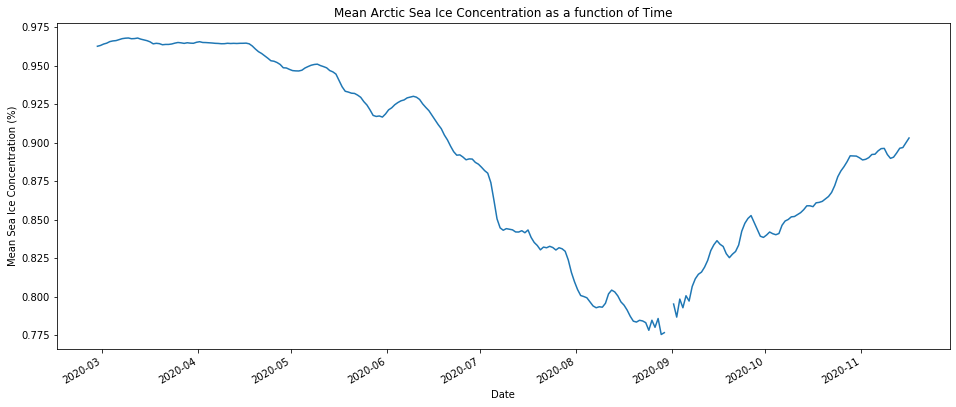

In [10]:
# Plot the data
_ = plt.figure(figsize=(16,6))
ice_Arctic_mean.plot()
plt.title('Mean Arctic Sea Ice Concentration as a function of Time')
plt.xlabel('Date')
plt.ylabel('Mean Sea Ice Concentration (%)')
plt.show()

This plot demonstrates seasonal trends in sea ice concentrations.

<a id='waf'></a>
## OISST on the WAF
### Introduction
<a href="https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr">OISST on the NCEI WAF</a> is organized in monthly `YYYYMM` directories containing individual daily netCDF4 files. These files are downloaded in their entirety using the `requests`, `xarray`, and `netCDF4` packages.

### Loading a netCDF4 file
For this tutorial, the April 2020 OISST data will be retrieved from the NCEI WAF, merged into a continuous `xarray.Dataset`, visualized, and saved to disk. 

In [11]:
# Setup
import netCDF4
import requests
import xarray as xr

In [12]:
# Define URLs
base_url = 'https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202004/oisst-avhrr-v02r01.202004{:02d}.nc'
urls = []
for i in range(1, 31):  # April 1-30
    urls.append(base_url.format(i))
urls[:5]

['https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202004/oisst-avhrr-v02r01.20200401.nc',
 'https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202004/oisst-avhrr-v02r01.20200402.nc',
 'https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202004/oisst-avhrr-v02r01.20200403.nc',
 'https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202004/oisst-avhrr-v02r01.20200404.nc',
 'https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/202004/oisst-avhrr-v02r01.20200405.nc']

In [13]:
# For each URL, load the netCDF4 file into a netCDF4.Dataset
nc4datasets = []
for i, url in enumerate(urls):
    resp = requests.get(url)  # Send a GET request for the file
    ncds = netCDF4.Dataset('oisst', memory=resp.content)  # Load the response into a netCDF4.Dataset
    nc4datasets.append(ncds)  # Add netCDF4.Dataset to the list of datasets
    if i % 5 == 0:
        print(i, end=' ')
print('Done')

0 5 10 15 20 25 Done


In [14]:
# Merge the Datasets in xarray using xarray.NetCDF4DataStore intermediates
oisst_April = xr.open_mfdataset([xr.backends.NetCDF4DataStore(nc) for nc in nc4datasets], combine='by_coords')
oisst_April

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 30, zlev: 1)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * zlev     (zlev) float32 0.0
  * time     (time) datetime64[ns] 2020-04-01T12:00:00 ... 2020-04-30T12:00:00
Data variables:
    sst      (time, zlev, lat, lon) float32 dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    anom     (time, zlev, lat, lon) float32 dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20200401.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    history:                    Final file created using preliminary as first...
    date_modified:              2020-04-16T09:13:00Z
    date_created:               2020-04-16T09:13:00Z
    product_version:            Version v02r01
    processing_level:           NOAA Level 4
    institution:                NOAA/National Centers for Environmental Infor...
    creator_url:                https://www.ncei.noaa.gov/
    creator_email:              oisst-help@noaa.gov
    keywords:                   Earth Science > Oceans > Ocean Temperature > ...
    keywords_vocabulary:        Global Change Master Directory (GCMD) Earth S...
    platform:                   Ships, buoys, Argo floats, MetOp-A, MetOp-B
    platform_vocabulary:        Global Change Master Directory (GCMD) Platfor...
    instrument:                 Earth Remote Sensing Instruments > Passive Re...
    instrument_vocabulary:      Global Change Master Directory (GCMD) Instrum...
    standard_name_vocabulary:   CF Standard Name Table (v40, 25 January 2017)
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.25
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    time_coverage_start:        2020-04-01T00:00:00Z
    time_coverage_end:          2020-04-01T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

### Understanding the dataset
From the output of the previous cell, one can see that the `xarray.Dataset` variable `ds` contains four data variables, `sst`, `anom`, `err`, and `ice`, which are functions of four coordinate dimensions, `zlev`, `lat`, `lon`, and `time`.

The global attributes reveal that the data variables are gridded along geospatial ranges -90 to 90 degrees North and 0 to 360 degrees East. The coordinate attributes clarify this grid as 720 `lat` steps in 0.25-degree intervals from -89.875 to 89.8975 degrees North, inclusive, and 1440 `lon` steps in 0.25-degree intervals from 0.125 to 359.875 degrees East, inclusive. The time coordinate starts at 1200 UTC April 1, 2020 and has daily steps through April 30, 2020. `zlev`, or the sea surface height, has only one possible value: 0 m.

The `sst` variable represents the daily sea surface temperature in degrees Celsius, `anom` is the daily sea surface temperature anomaly in degrees Celsius, `err` is the estimated error standard deviation of `sst` in degrees Celsius, and `ice` is the sea ice concentration in percent by volume.

### Visualizing the data
`xarray.Dataset`s integrate well with `cartopy` maps. Simply instantiated an `xarray.DataArray` by selecting one of the data variables and selecting values for `zlev` and `time`.

In [15]:
# Select the anom DataArray
anom = oisst_April['anom']
anom

<xarray.DataArray 'anom' (time: 30, zlev: 1, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(30, 1, 720, 1440), dtype=float32, chunksize=(1, 1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * zlev     (zlev) float32 0.0
  * time     (time) datetime64[ns] 2020-04-01T12:00:00 ... 2020-04-30T12:00:00
Attributes:
    long_name:  Daily sea surface temperature anomalies
    units:      Celsius
    valid_min:  -1200
    valid_max:  1200

In [16]:
# Select values for zlev and time using isel (index select)
# isel(zlev=0) selects the first zlev value
# sel(time=np.datetime64('2020-04-12'), method='nearest') selects the time value closest to April 12, 2020.
anom_20200412 = anom.isel(zlev=0).sel(time='2020-04-12', method='nearest')
anom_20200412

<xarray.DataArray 'anom' (time: 1, lat: 720, lon: 1440)>
dask.array<getitem, shape=(1, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
    zlev     float32 0.0
  * time     (time) datetime64[ns] 2020-04-12T12:00:00
Attributes:
    long_name:  Daily sea surface temperature anomalies
    units:      Celsius
    valid_min:  -1200
    valid_max:  1200

In [17]:
# Setup mapping with cartopy
import cartopy
from cartopy import crs as ccrs
from cartopy import feature as cfeat
from matplotlib import pyplot as plt
%matplotlib inline

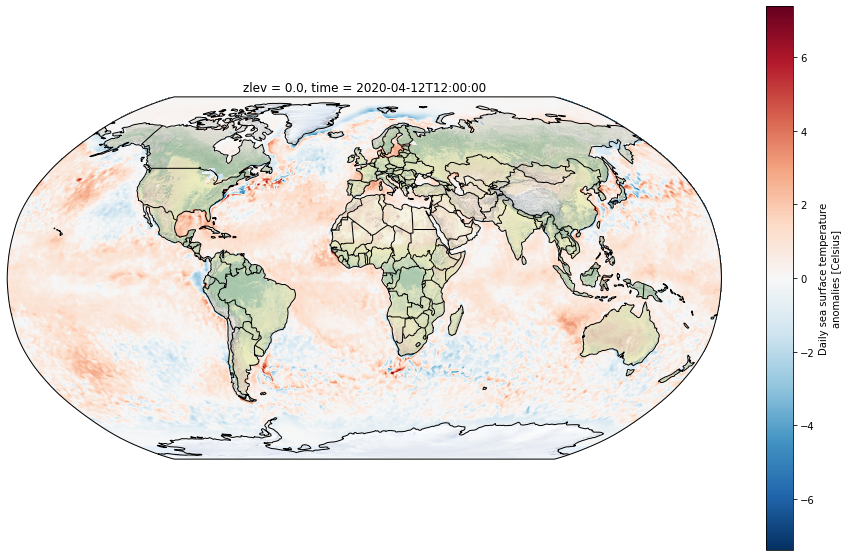

In [18]:
# Map the data
_ = plt.figure(figsize=(16,10))
ax = plt.axes(projection=ccrs.Robinson())  # Choose projection
ax.coastlines()  # Add coastlines
ax.stock_img()  # Add land coloring
ax.add_feature(cfeat.BORDERS)  # Add national borders

anom_20200412.plot(ax=ax, transform=ccrs.PlateCarree())
plt.show()

### Saving the dataset
`xarray.Dataset`s can be saved as netCDF4 files for future analysis.

In [19]:
# Save to netCDF4
filename = 'oisst_202004.nc'
oisst_April.to_netcdf(filename)  # This saves a netCDF4 file in the local working directory

In [20]:
# Test loading from disk
oisst_loaded = xr.open_dataset(filename)
oisst_loaded

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 30, zlev: 1)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * zlev     (zlev) float32 0.0
  * time     (time) datetime64[ns] 2020-04-01T12:00:00 ... 2020-04-30T12:00:00
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20200401.nc
    naming_authority:           gov.noaa.ncei
    summary:                    NOAAs 1/4-degree Daily Optimum Interpolation ...
    cdm_data_type:              Grid
    history:                    Final file created using preliminary as first...
    date_modified:              2020-04-16T09:13:00Z
    date_created:               2020-04-16T09:13:00Z
    product_version:            Version v02r01
    processing_level:           NOAA Level 4
    institution:                NOAA/National Centers for Environmental Infor...
    creator_url:                https://www.ncei.noaa.gov/
    creator_email:              oisst-help@noaa.gov
    keywords:                   Earth Science > Oceans > Ocean Temperature > ...
    keywords_vocabulary:        Global Change Master Directory (GCMD) Earth S...
    platform:                   Ships, buoys, Argo floats, MetOp-A, MetOp-B
    platform_vocabulary:        Global Change Master Directory (GCMD) Platfor...
    instrument:                 Earth Remote Sensing Instruments > Passive Re...
    instrument_vocabulary:      Global Change Master Directory (GCMD) Instrum...
    standard_name_vocabulary:   CF Standard Name Table (v40, 25 January 2017)
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.25
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.25
    time_coverage_start:        2020-04-01T00:00:00Z
    time_coverage_end:          2020-04-01T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

## Conclusion
The OISST analysis includes over 30 years of data and is a powerful tool for studying long-term trends of sea surface temperature and ice concentrations at high resolution. This notebook demonstrated two techniques for accessing the daily OISST v2.1 dataset using Jupyter notebooks and Python. The THREDDS feature collections offer continuous-time, ready-to-use aggregations that can be retrieved and subsetted on demand. The  NCEI WAF offers only individual files for download, but these can be manually merged and saved locally. 